In [1]:
import pydicom as dcm
from tools import *
import matplotlib.pyplot as plt

In [2]:
def get_ROI_slice(z_target,z_list):
    
    slice_num = 0
    slice_nums = []
    for z in z_list:
        if z == z_target:
            slice_nums.append(slice_num)
#             return slice_num
        slice_num +=1
    return slice_nums


In [101]:
path_new = '/data/kayla/anon_images/patients/272/20180503_CT_25_APR_2018/RS.1.2.246.352.221.550032474694837233410476777862273200261.dcm'
path_old = '/mnt/iDriveShare/kayla/CBCT_images/anonymized/patients/272/20180503_CT_25_APR_2018/RS.1.2.246.352.221.550032474694837233410476777862273200261.dcm'

In [102]:
RS_new = dcm.read_file(path_new)
RS_old = dcm.read_file(path_old)

In [103]:
slices = [dcm.read_file('/data/kayla/anon_images/patients/272/20180503_CT_25_APR_2018/'+ s) for s in os.listdir('/data/kayla/anon_images/patients/272/20180503_CT_25_APR_2018/') if 'CT' in s]
# Order slices
slices.sort(key = lambda x: (x.InstanceNumber))
image = get_pixels_hu(slices)
origin = slices[0].ImagePositionPatient
start_z = origin[2]
start_x = origin[0]
start_y = origin[1]
z_spacing = slices[0].SliceThickness 
pixel_spacing = slices[0].PixelSpacing
spacing = [pixel_spacing[0],pixel_spacing[1],z_spacing]


Intersept: -1000
slope: 1


In [111]:
z = -545

In [112]:
dict_contours_b, z_lists_b = get_all_ROI_contours(['BODY'], RS_old)
roi_1 = get_ROI_slice(z, z_lists_b[0])[0]
# roi_2 = get_ROI_slice(z, z_lists_b[0])[1]
roi_x_old1, roi_y_old1= get_ROI_pixel_array(dict_contours_b['BODY'][roi_1],start_x,start_y,pixel_spacing)
roi_x_old2, roi_y_old2= get_ROI_pixel_array(dict_contours_b['BODY'][roi_2],start_x,start_y,pixel_spacing)

dict_contours_b, z_lists_b = get_all_ROI_contours(['BODY'], RS_new)
roi_1 = get_ROI_slice(z, z_lists_b[0])[0]
# roi_2 = get_ROI_slice(z, z_lists_b[0])[1]
roi_x_new1, roi_y_new1= get_ROI_pixel_array(dict_contours_b['BODY'][roi_1],start_x,start_y,pixel_spacing)
roi_x_new2, roi_y_new2= get_ROI_pixel_array(dict_contours_b['BODY'][roi_2],start_x,start_y,pixel_spacing)

In [113]:
slice_num = int((-545-start_z)/z_spacing)
print(slice_num)
# slice_num=100
# z = slice_num*z_spacing+start_z
# print(z)

84


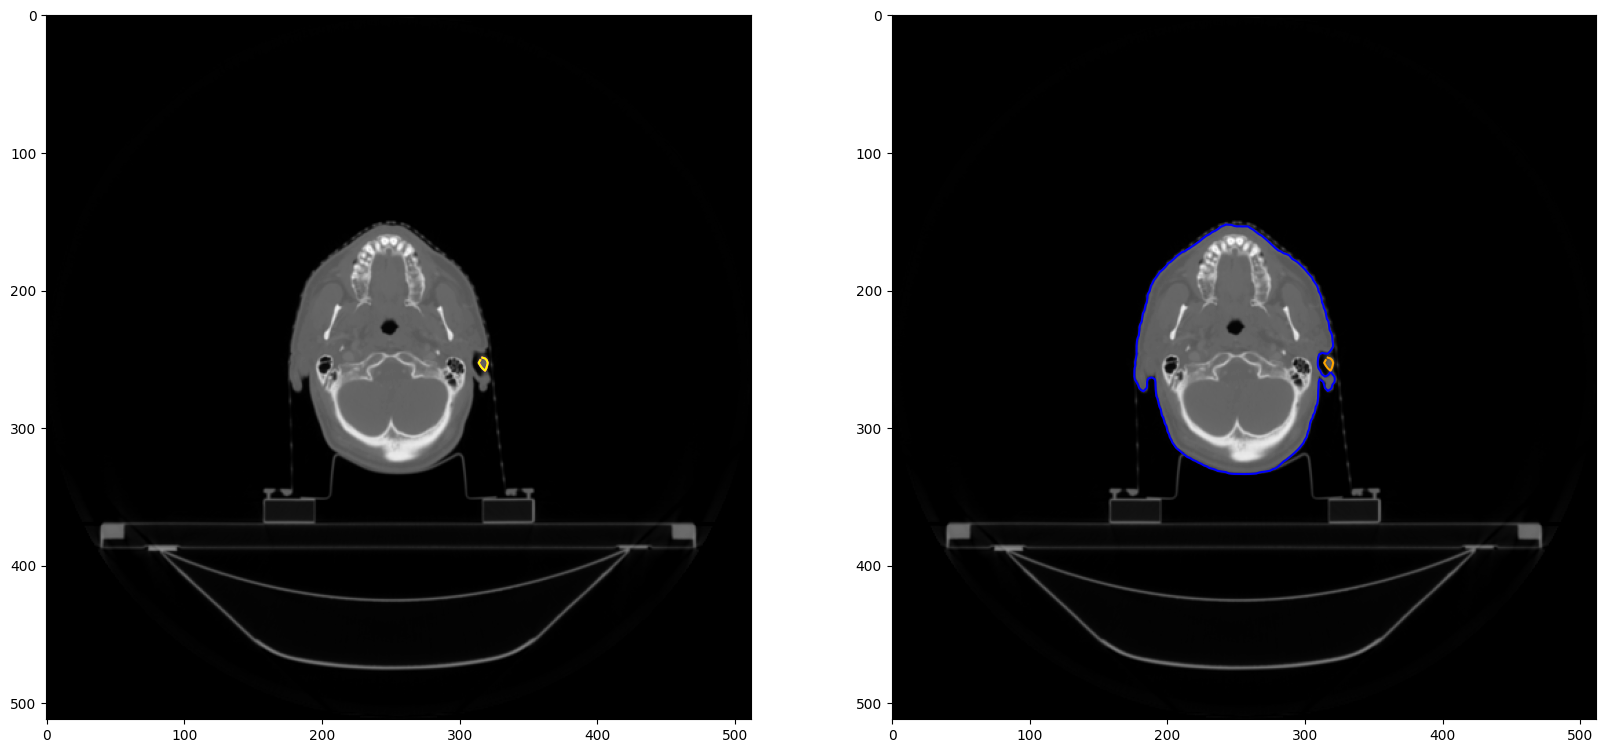

In [114]:

fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1,2,1)
plt.imshow(image[slice_num],cmap='gray')

plt.plot(roi_x_old1,roi_y_old1,'-',color='magenta')
plt.plot(roi_x_old2,roi_y_old2,'-',color='yellow')

fig.add_subplot(1,2,2)
plt.imshow(image[slice_num],cmap='gray')
plt.plot(roi_x_new1,roi_y_new1,'-',color='blue')
plt.plot(roi_x_new2,roi_y_new2,'-',color='orange')

In [78]:
cnt = ['-6.76', 8.889999999999999, '-497.0', '-5.91', 8.889999999999999, '-497.0', '-4.3', 8.889999999999999, '-497.0', '-2.93', 8.889999999999999, '-497.0', '-1.84', 8.889999999999999, '-497.0', '-0.61', 8.889999999999999, '-497.0', '-0.27', 8.889999999999999, '-497.0', '0.61', 8.889999999999999, '-497.0', '1.12', 8.889999999999999, '-497.0', '1.92', 8.889999999999999, '-497.0', '2.32', 8.889999999999999, '-497.0', '3.07', 8.889999999999999, '-497.0', '3.43', 8.889999999999999, '-497.0', '4.01', 8.889999999999999, '-497.0', '5.14', 8.889999999999999, '-497.0', '5.53', 8.889999999999999, '-497.0', '7.33', 8.889999999999999, '-497.0', '7.99', 8.889999999999999, '-497.0', '10.2', 8.889999999999999, '-497.0', '10.44', 8.889999999999999, '-497.0', '12.9', 8.889999999999999, '-497.0', '15.36', 8.889999999999999, '-497.0', '16.43', 8.889999999999999, '-497.0', '17.81', 8.889999999999999, '-497.0', '20.27', 8.889999999999999, '-497.0', '22.73', 8.889999999999999, '-497.0', '25.18', 8.889999999999999, '-497.0', '27.64', 8.889999999999999, '-497.0', '30.1', 8.889999999999999, '-497.0', '32.56', 8.889999999999999, '-497.0', '34.4', 8.889999999999999, '-497.0', '35.01', 8.889999999999999, '-497.0', '37.47', 8.889999999999999, '-497.0', '38.78', 8.889999999999999, '-497.0', '39.93', 8.889999999999999, '-497.0', '41.3', 8.889999999999999, '-497.0', '42.38', 8.889999999999999, '-497.0', '43.35', 8.889999999999999, '-497.0', '44.84', 8.889999999999999, '-497.0', '45.22', 8.889999999999999, '-497.0', '46.91', 8.889999999999999, '-497.0', '47.3', '8.97', '-497.0', '48.87', '10.99', '-497.0', '49.75', '12.05', '-497.0', '51.06', '13.45', '-497.0', '52.21', '14.53', '-497.0', '53.77', '15.9', '-497.0', '54.67', '16.7', '-497.0', '57.13', '18.0', '-497.0', '57.56', '18.36', '-497.0', '59.58', '20.02', '-497.0', '60.38', '20.82', '-497.0', '61.66', '23.27', '-497.0', '62.04', '23.71', '-497.0', '63.61', '25.73', '-497.0', '64.5', '26.96', '-497.0', '65.44', '28.19', '-497.0', '66.16', '30.65', '-497.0', '66.95', '31.69', '-497.0', '67.92', '33.1', '-497.0', '69.41', '35.46', '-497.0', '69.49', '35.56', '-497.0', '70.06', '38.02', '-497.0', '70.41', '40.47', '-497.0', '70.87', '42.93', '-497.0', '71.39', '45.39', '-497.0', '71.87', '46.34', '-497.0', '72.62', '47.84', '-497.0', '72.71', '50.3', '-497.0', '72.81', '52.76', '-497.0', '72.95', '55.22', '-497.0', '73.33', '57.67', '-497.0', '73.48', '60.13', '-497.0', '74.33', '61.73', '-497.0', '74.83', '62.59', '-497.0', '75.48', '65.04', '-497.0', '75.94', '67.5', '-497.0', '76.78', '68.95', '-497.0', '77.43', '69.96', '-497.0', '77.87', '72.42', '-497.0', '77.87', '74.87', '-497.0', '78.01', '77.33', '-497.0', '78.24', '79.79', '-497.0', '78.44', '82.24', '-497.0', '78.73', '84.7', '-497.0', '79.24', '85.93', '-497.0', '79.75', '87.16', '-497.0', '80.03', '89.61', '-497.0', '80.32', '92.07', '-497.0', '80.47', '94.53', '-497.0', '80.54', '96.99', '-497.0', '80.47', '99.44', '-497.0', '80.39', '101.9', '-497.0', '80.32', '104.36', '-497.0', '80.03', '106.81', '-497.0', '79.6', '109.27', '-497.0', '79.24', '109.88', '-497.0', '78.27', '111.73', '-497.0', '77.93', '114.18', '-497.0', '77.53', '116.64', '-497.0', '76.78', '117.99', '-497.0', '76.13', '119.1', '-497.0', '75.55', '121.56', '-497.0', '75.17', '124.01', '-497.0', '74.33', '125.61', '-497.0', '73.85', '126.47', '-497.0', '73.33', '128.93', '-497.0', '73.02', '131.38', '-497.0', '72.62', '133.84', '-497.0', '71.87', '135.34', '-497.0', '71.39', '136.3', '-497.0', '70.87', '138.75', '-497.0', '70.41', '141.21', '-497.0', '70.16', '143.67', '-497.0', '69.41', '145.02', '-497.0', '68.8', '146.13', '-497.0', '68.26', '148.58', '-497.0', '67.46', '151.04', '-497.0', '66.95', '151.82', '-497.0', '65.93', '153.5', '-497.0', '65.15', '155.95', '-497.0', '64.5', '156.96', '-497.0', '63.61', '158.41', '-497.0', '62.69', '160.87', '-497.0', '62.04', '161.87', '-497.0', '61.15', '163.33', '-497.0', '60.23', '165.78', '-497.0', '59.58', '166.63', '-497.0', '58.42', '168.24', '-497.0', '57.13', '169.7', '-497.0', '56.13', '170.7', '-497.0', '54.67', '172.07', '-497.0', '53.58', '173.15', '-497.0', '52.21', '174.61', '-497.0', '51.27', '175.61', '-497.0', '49.75', '177.59', '-497.0', '49.32', '178.07', '-497.0', '47.3', '179.64', '-497.0', '46.07', '180.52', '-497.0', '44.84', '181.41', '-497.0', '42.38', '182.19', '-497.0', '41.26', '182.98', '-497.0', '39.93', '183.87', '-497.0', '37.47', '184.55', '-497.0', '36.14', '185.44', '-497.0', '35.01', '186.23', '-497.0', '32.56', '186.87', '-497.0', '30.88', '187.9', '-497.0', '30.1', '188.4', '-497.0', '27.64', '189.05', '-497.0', '25.18', '189.51', '-497.0', '23.59', '190.35', '-497.0', '22.73', '190.83', '-497.0', '20.27', '191.25', '-497.0', '17.81', '191.5', '-497.0', '15.36', '191.66', '-497.0', '12.9', '191.96', '-497.0', '10.44', '192.2', '-497.0', '8.86', '192.81', '-497.0', '7.99', '193.17', '-497.0', '5.53', '193.35', '-497.0', '3.07', '193.46', '-497.0', '0.61', '193.6', '-497.0', '-1.84', '193.5', '-497.0', '-4.3', '193.46', '-497.0', '-6.76', '193.17', '-497.0', '-7.99', '192.81', '-497.0', '-9.21', '192.45', '-497.0', '-11.67', '192.12', '-497.0', '-14.13', '191.87', '-497.0', '-16.58', '191.66', '-497.0', '-19.04', '191.5', '-497.0', '-21.5', '191.2', '-497.0', '-23.96', '190.86', '-497.0', '-24.82', '190.35', '-497.0', '-26.41', '189.51', '-497.0', '-28.87', '189.05', '-497.0', '-31.33', '188.4', '-497.0', '-32.11', '187.9', '-497.0', '-33.78', '186.87', '-497.0', '-36.24', '186.19', '-497.0', '-37.47', '185.44', '-497.0', '-38.7', '184.64', '-497.0', '-41.16', '183.87', '-497.0', '-42.49', '182.98', '-497.0', '-43.61', '182.19', '-497.0', '-46.07', '181.17', '-497.0', '-46.86', '180.52', '-497.0', '-48.53', '179.23', '-497.0', '-50.02', '178.07', '-497.0', '-50.98', '177.27', '-497.0', '-52.75', '175.61', '-497.0', '-53.44', '174.96', '-497.0', '-55.9', '173.54', '-497.0', '-56.28', '173.15', '-497.0', '-58.35', '171.2', '-497.0', '-58.86', '170.7', '-497.0', '-60.43', '168.24', '-497.0', '-60.81', '167.77', '-497.0', '-62.1', '165.78', '-497.0', '-63.27', '163.99', '-497.0', '-63.77', '163.33', '-497.0', '-65.08', '160.87', '-497.0', '-65.73', '160.08', '-497.0', '-67.1', '158.41', '-497.0', '-68.18', '157.18', '-497.0', '-69.21', '155.95', '-497.0', '-70.64', '154.11', '-497.0', '-71.15', '153.5', '-497.0', '-72.07', '151.04', '-497.0', '-73.1', '149.5', '-497.0', '-73.71', '148.58', '-497.0', '-74.39', '146.13', '-497.0', '-75.55', '144.23', '-497.0', '-75.94', '143.67', '-497.0', '-76.64', '141.21', '-497.0', '-77.26', '138.75', '-497.0', '-78.01', '137.53', '-497.0', '-78.76', '136.3', '-497.0', '-79.32', '133.84', '-497.0', '-80.11', '131.38', '-497.0', '-80.47', '130.77', '-497.0', '-81.49', '128.93', '-497.0', '-82.17', '126.47', '-497.0', '-82.92', '125.34', '-497.0', '-83.81', '124.01', '-497.0', '-84.36', '121.56', '-497.0', '-85.38', '119.71', '-497.0', '-85.74', '119.1', '-497.0', '-86.23', '116.64', '-497.0', '-86.53', '114.18', '-497.0', '-87.15', '111.73', '-497.0', '-87.62', '109.27', '-497.0', '-87.84', '109.04', '-497.0', '-88.1', '109.27', '-497.0', '-90.3', '111.08', '-497.0', '-91.15', '111.73', '-497.0', '-92.75', '112.89', '-497.0', '-93.91', '111.73', '-497.0', '-95.21', '109.78', '-497.0', '-95.59', '109.27', '-497.0', '-96.0', '106.81', '-497.0', '-96.05', '104.36', '-497.0', '-95.72', '101.9', '-497.0', '-95.21', '101.12', '-497.0', '-94.29', '99.44', '-497.0', '-92.75', '97.39', '-497.0', '-92.37', '96.99', '-497.0', '-90.95', '94.53', '-497.0', '-90.66', '92.07', '-497.0', '-90.3', '90.54', '-497.0', '-90.08', '89.61', '-497.0', '-89.91', '87.16', '-497.0', '-89.6', '84.7', '-497.0', '-89.3', '82.24', '-497.0', '-89.14', '79.79', '-497.0', '-89.07', '77.33', '-497.0', '-89.07', '74.87', '-497.0', '-89.07', '72.42', '-497.0', '-88.99', '69.96', '-497.0', '-88.92', '67.5', '-497.0', '-88.78', '65.04', '-497.0', '-88.53', '62.59', '-497.0', '-88.34', '60.13', '-497.0', '-87.84', '58.7', '-497.0', '-87.48', '57.67', '-497.0', '-87.19', '55.22', '-497.0', '-87.04', '52.76', '-497.0', '-87.04', '50.3', '-497.0', '-87.19', '47.84', '-497.0', '-87.15', '45.39', '-497.0', '-86.75', '42.93', '-497.0', '-86.38', '40.47', '-497.0', '-85.89', '38.02', '-497.0', '-85.38', '37.06', '-497.0', '-84.63', '35.56', '-497.0', '-84.23', '33.1', '-497.0', '-83.46', '30.65', '-497.0', '-82.92', '30.03', '-497.0', '-81.57', '28.19', '-497.0', '-80.47', '26.7', '-497.0', '-79.67', '25.73', '-497.0', '-78.66', '23.27', '-497.0', '-78.01', '22.54', '-497.0', '-76.49', '20.82', '-497.0', '-75.55', '19.82', '-497.0', '-74.26', '18.36', '-497.0', '-73.1', '16.87', '-497.0', '-72.3', '15.9', '-497.0', '-71.43', '13.45', '-497.0', '-70.64', '12.6', '-497.0', '-69.21', '10.99', '-497.0', '-68.18', '9.67', '-497.0', '-67.34', 8.889999999999999, '-497.0', '-65.73', 8.889999999999999, '-497.0', '-65.48', 8.889999999999999, '-497.0', '-63.27', 8.889999999999999, '-497.0', '-62.58', 8.889999999999999, '-497.0', '-60.81', 8.889999999999999, '-497.0', '-60.27', 8.889999999999999, '-497.0', '-58.57', 8.889999999999999, '-497.0', '-58.35', 8.889999999999999, '-497.0', '-55.9', 8.889999999999999, '-497.0', '-53.44', 8.889999999999999, '-497.0', '-52.83', 8.889999999999999, '-497.0', '-50.98', 8.889999999999999, '-497.0', '-48.53', 8.889999999999999, '-497.0', '-46.07', 8.889999999999999, '-497.0', '-43.61', 8.889999999999999, '-497.0', '-41.16', 8.889999999999999, '-497.0', '-38.7', 8.889999999999999, '-497.0', '-36.24', 8.889999999999999, '-497.0', '-33.78', 8.889999999999999, '-497.0', '-31.33', 8.889999999999999, '-497.0', '-28.87', 8.889999999999999, '-497.0', '-26.41', 8.889999999999999, '-497.0', '-26.3', 8.889999999999999, '-497.0', '-23.96', 8.889999999999999, '-497.0', '-22.46', 8.889999999999999, '-497.0', '-21.5', 8.889999999999999, '-497.0', '-20.07', 8.889999999999999, '-497.0', '-19.04', 8.889999999999999, '-497.0', '-18.43', 8.889999999999999, '-497.0', '-17.74', 8.889999999999999, '-497.0', '-17.09', 8.889999999999999, '-497.0', '-16.58', 8.889999999999999, '-497.0', '-15.83', 8.889999999999999, '-497.0', '-15.07', 8.889999999999999, '-497.0', '-14.13', 8.889999999999999, '-497.0', '-13.33', 8.889999999999999, '-497.0', '-12.32', 8.889999999999999, '-497.0', '-11.67', 8.889999999999999, '-497.0', '-9.21', 8.889999999999999, '-497.0', '-8.14', 8.889999999999999, '-497.0']
cnt_clean = []
for c in cnt:
    cnt_clean.append(float(c))
roi_x_new1, roi_y_new1= get_ROI_pixel_array(cnt_clean,start_x,start_y,pixel_spacing)

In [99]:
row = ['-6.76', 8.889999999999999, '-497.0', '-5.91', 8.889999999999999, '-497.0', '-4.3', 8.889999999999999, '-497.0', '-2.93', 8.889999999999999, '-497.0', '-1.84', 8.889999999999999, '-497.0', '-0.61', 8.889999999999999, '-497.0', '-0.27', 8.889999999999999, '-497.0', '0.61', 8.889999999999999, '-497.0', '1.12', 8.889999999999999, '-497.0', '1.92', 8.889999999999999, '-497.0', '2.32', 8.889999999999999, '-497.0', '3.07', 8.889999999999999, '-497.0', '3.43', 8.889999999999999, '-497.0', '4.01', 8.889999999999999, '-497.0', '5.14', 8.889999999999999, '-497.0', '5.53', 8.889999999999999, '-497.0', '7.33', 8.889999999999999, '-497.0', '7.99', 8.889999999999999, '-497.0', '10.2', 8.889999999999999, '-497.0', '10.44', 8.889999999999999, '-497.0', '12.9', 8.889999999999999, '-497.0', '15.36', 8.889999999999999, '-497.0', '16.43', 8.889999999999999, '-497.0', '17.81', 8.889999999999999, '-497.0', '20.27', 8.889999999999999, '-497.0', '22.73', 8.889999999999999, '-497.0', '25.18', 8.889999999999999, '-497.0', '27.64', 8.889999999999999, '-497.0', '30.1', 8.889999999999999, '-497.0', '32.56', 8.889999999999999, '-497.0', '34.4', 8.889999999999999, '-497.0', '35.01', 8.889999999999999, '-497.0', '37.47', 8.889999999999999, '-497.0', '38.78', 8.889999999999999, '-497.0', '39.93', 8.889999999999999, '-497.0', '41.3', 8.889999999999999, '-497.0', '42.38', 8.889999999999999, '-497.0', '43.35', 8.889999999999999, '-497.0', '44.84', 8.889999999999999, '-497.0', '45.22', 8.889999999999999, '-497.0', '46.91', 8.889999999999999, '-497.0', '47.3', '8.97', '-497.0', '48.87', '10.99', '-497.0', '49.75', '12.05', '-497.0', '51.06', '13.45', '-497.0', '52.21', '14.53', '-497.0', '53.77', '15.9', '-497.0', '54.67', '16.7', '-497.0', '57.13', '18.0', '-497.0', '57.56', '18.36', '-497.0', '59.58', '20.02', '-497.0', '60.38', '20.82', '-497.0', '61.66', '23.27', '-497.0', '62.04', '23.71', '-497.0', '63.61', '25.73', '-497.0', '64.5', '26.96', '-497.0', '65.44', '28.19', '-497.0', '66.16', '30.65', '-497.0', '66.95', '31.69', '-497.0', '67.92', '33.1', '-497.0', '69.41', '35.46', '-497.0', '69.49', '35.56', '-497.0', '70.06', '38.02', '-497.0', '70.41', '40.47', '-497.0', '70.87', '42.93', '-497.0', '71.39', '45.39', '-497.0', '71.87', '46.34', '-497.0', '72.62', '47.84', '-497.0', '72.71', '50.3', '-497.0', '72.81', '52.76', '-497.0', '72.95', '55.22', '-497.0', '73.33', '57.67', '-497.0', '73.48', '60.13', '-497.0', '74.33', '61.73', '-497.0', '74.83', '62.59', '-497.0', '75.48', '65.04', '-497.0', '75.94', '67.5', '-497.0', '76.78', '68.95', '-497.0', '77.43', '69.96', '-497.0', '77.87', '72.42', '-497.0', '77.87', '74.87', '-497.0', '78.01', '77.33', '-497.0', '78.24', '79.79', '-497.0', '78.44', '82.24', '-497.0', '78.73', '84.7', '-497.0', '79.24', '85.93', '-497.0', '79.75', '87.16', '-497.0', '80.03', '89.61', '-497.0', '80.32', '92.07', '-497.0', '80.47', '94.53', '-497.0', '80.54', '96.99', '-497.0', '80.47', '99.44', '-497.0', '80.39', '101.9', '-497.0', '80.32', '104.36', '-497.0', '80.03', '106.81', '-497.0', '79.6', '109.27', '-497.0', '79.24', '109.88', '-497.0', '78.27', '111.73', '-497.0', '77.93', '114.18', '-497.0', '77.53', '116.64', '-497.0', '76.78', '117.99', '-497.0', '76.13', '119.1', '-497.0', '75.55', '121.56', '-497.0', '75.17', '124.01', '-497.0', '74.33', '125.61', '-497.0', '73.85', '126.47', '-497.0', '73.33', '128.93', '-497.0', '73.02', '131.38', '-497.0', '72.62', '133.84', '-497.0', '71.87', '135.34', '-497.0', '71.39', '136.3', '-497.0', '70.87', '138.75', '-497.0', '70.41', '141.21', '-497.0', '70.16', '143.67', '-497.0', '69.41', '145.02', '-497.0', '68.8', '146.13', '-497.0', '68.26', '148.58', '-497.0', '67.46', '151.04', '-497.0', '66.95', '151.82', '-497.0', '65.93', '153.5', '-497.0', '65.15', '155.95', '-497.0', '64.5', '156.96', '-497.0', '63.61', '158.41', '-497.0', '62.69', '160.87', '-497.0', '62.04', '161.87', '-497.0', '61.15', '163.33', '-497.0', '60.23', '165.78', '-497.0', '59.58', '166.63', '-497.0', '58.42', '168.24', '-497.0', '57.13', '169.7', '-497.0', '56.13', '170.7', '-497.0', '54.67', '172.07', '-497.0', '53.58', '173.15', '-497.0', '52.21', '174.61', '-497.0', '51.27', '175.61', '-497.0', '49.75', '177.59', '-497.0', '49.32', '178.07', '-497.0', '47.3', '179.64', '-497.0', '46.07', '180.52', '-497.0', '44.84', '181.41', '-497.0', '42.38', '182.19', '-497.0', '41.26', '182.98', '-497.0', '39.93', '183.87', '-497.0', '37.47', '184.55', '-497.0', '36.14', '185.44', '-497.0', '35.01', '186.23', '-497.0', '32.56', '186.87', '-497.0', '30.88', '187.9', '-497.0', '30.1', '188.4', '-497.0', '27.64', '189.05', '-497.0', '25.18', '189.51', '-497.0', '23.59', '190.35', '-497.0', '22.73', '190.83', '-497.0', '20.27', '191.25', '-497.0', '17.81', '191.5', '-497.0', '15.36', '191.66', '-497.0', '12.9', '191.96', '-497.0', '10.44', '192.2', '-497.0', '8.86', '192.81', '-497.0', '7.99', '193.17', '-497.0', '5.53', '193.35', '-497.0', '3.07', '193.46', '-497.0', '0.61', '193.6', '-497.0', '-1.84', '193.5', '-497.0', '-4.3', '193.46', '-497.0', '-6.76', '193.17', '-497.0', '-7.99', '192.81', '-497.0', '-9.21', '192.45', '-497.0', '-11.67', '192.12', '-497.0', '-14.13', '191.87', '-497.0', '-16.58', '191.66', '-497.0', '-19.04', '191.5', '-497.0', '-21.5', '191.2', '-497.0', '-23.96', '190.86', '-497.0', '-24.82', '190.35', '-497.0', '-26.41', '189.51', '-497.0', '-28.87', '189.05', '-497.0', '-31.33', '188.4', '-497.0', '-32.11', '187.9', '-497.0', '-33.78', '186.87', '-497.0', '-36.24', '186.19', '-497.0', '-37.47', '185.44', '-497.0', '-38.7', '184.64', '-497.0', '-41.16', '183.87', '-497.0', '-42.49', '182.98', '-497.0', '-43.61', '182.19', '-497.0', '-46.07', '181.17', '-497.0', '-46.86', '180.52', '-497.0', '-48.53', '179.23', '-497.0', '-50.02', '178.07', '-497.0', '-50.98', '177.27', '-497.0', '-52.75', '175.61', '-497.0', '-53.44', '174.96', '-497.0', '-55.9', '173.54', '-497.0', '-56.28', '173.15', '-497.0', '-58.35', '171.2', '-497.0', '-58.86', '170.7', '-497.0', '-60.43', '168.24', '-497.0', '-60.81', '167.77', '-497.0', '-62.1', '165.78', '-497.0', '-63.27', '163.99', '-497.0', '-63.77', '163.33', '-497.0', '-65.08', '160.87', '-497.0', '-65.73', '160.08', '-497.0', '-67.1', '158.41', '-497.0', '-68.18', '157.18', '-497.0', '-69.21', '155.95', '-497.0', '-70.64', '154.11', '-497.0', '-71.15', '153.5', '-497.0', '-72.07', '151.04', '-497.0', '-73.1', '149.5', '-497.0', '-73.71', '148.58', '-497.0', '-74.39', '146.13', '-497.0', '-75.55', '144.23', '-497.0', '-75.94', '143.67', '-497.0', '-76.64', '141.21', '-497.0', '-77.26', '138.75', '-497.0', '-78.01', '137.53', '-497.0', '-78.76', '136.3', '-497.0', '-79.32', '133.84', '-497.0', '-80.11', '131.38', '-497.0', '-80.47', '130.77', '-497.0', '-81.49', '128.93', '-497.0', '-82.17', '126.47', '-497.0', '-82.92', '125.34', '-497.0', '-83.81', '124.01', '-497.0', '-84.36', '121.56', '-497.0', '-85.38', '119.71', '-497.0', '-85.74', '119.1', '-497.0', '-86.23', '116.64', '-497.0', '-86.53', '114.18', '-497.0', '-87.15', '111.73', '-497.0', '-87.62', '109.27', '-497.0', '-87.84', '109.04', '-497.0', '-88.1', '109.27', '-497.0', '-90.3', '111.08', '-497.0', '-91.15', '111.73', '-497.0', '-92.75', '112.89', '-497.0', '-93.91', '111.73', '-497.0', '-95.21', '109.78', '-497.0', '-95.59', '109.27', '-497.0', '-96.0', '106.81', '-497.0', '-96.05', '104.36', '-497.0', '-95.72', '101.9', '-497.0', '-95.21', '101.12', '-497.0', '-94.29', '99.44', '-497.0', '-92.75', '97.39', '-497.0', '-92.37', '96.99', '-497.0', '-90.95', '94.53', '-497.0', '-90.66', '92.07', '-497.0', '-90.3', '90.54', '-497.0', '-90.08', '89.61', '-497.0', '-89.91', '87.16', '-497.0', '-89.6', '84.7', '-497.0', '-89.3', '82.24', '-497.0', '-89.14', '79.79', '-497.0', '-89.07', '77.33', '-497.0', '-89.07', '74.87', '-497.0', '-89.07', '72.42', '-497.0', '-88.99', '69.96', '-497.0', '-88.92', '67.5', '-497.0', '-88.78', '65.04', '-497.0', '-88.53', '62.59', '-497.0', '-88.34', '60.13', '-497.0', '-87.84', '58.7', '-497.0', '-87.48', '57.67', '-497.0', '-87.19', '55.22', '-497.0', '-87.04', '52.76', '-497.0', '-87.04', '50.3', '-497.0', '-87.19', '47.84', '-497.0', '-87.15', '45.39', '-497.0', '-86.75', '42.93', '-497.0', '-86.38', '40.47', '-497.0', '-85.89', '38.02', '-497.0', '-85.38', '37.06', '-497.0', '-84.63', '35.56', '-497.0', '-84.23', '33.1', '-497.0', '-83.46', '30.65', '-497.0', '-82.92', '30.03', '-497.0', '-81.57', '28.19', '-497.0', '-80.47', '26.7', '-497.0', '-79.67', '25.73', '-497.0', '-78.66', '23.27', '-497.0', '-78.01', '22.54', '-497.0', '-76.49', '20.82', '-497.0', '-75.55', '19.82', '-497.0', '-74.26', '18.36', '-497.0', '-73.1', '16.87', '-497.0', '-72.3', '15.9', '-497.0', '-71.43', '13.45', '-497.0', '-70.64', '12.6', '-497.0', '-69.21', '10.99', '-497.0', '-68.18', '9.67', '-497.0', '-67.34', 8.889999999999999, '-497.0', '-65.73', 8.889999999999999, '-497.0', '-65.48', 8.889999999999999, '-497.0', '-63.27', 8.889999999999999, '-497.0', '-62.58', 8.889999999999999, '-497.0', '-60.81', 8.889999999999999, '-497.0', '-60.27', 8.889999999999999, '-497.0', '-58.57', 8.889999999999999, '-497.0', '-58.35', 8.889999999999999, '-497.0', '-55.9', 8.889999999999999, '-497.0', '-53.44', 8.889999999999999, '-497.0', '-52.83', 8.889999999999999, '-497.0', '-50.98', 8.889999999999999, '-497.0', '-48.53', 8.889999999999999, '-497.0', '-46.07', 8.889999999999999, '-497.0', '-43.61', 8.889999999999999, '-497.0', '-41.16', 8.889999999999999, '-497.0', '-38.7', 8.889999999999999, '-497.0', '-36.24', 8.889999999999999, '-497.0', '-33.78', 8.889999999999999, '-497.0', '-31.33', 8.889999999999999, '-497.0', '-28.87', 8.889999999999999, '-497.0', '-26.41', 8.889999999999999, '-497.0', '-26.3', 8.889999999999999, '-497.0', '-23.96', 8.889999999999999, '-497.0', '-22.46', 8.889999999999999, '-497.0', '-21.5', 8.889999999999999, '-497.0', '-20.07', 8.889999999999999, '-497.0', '-19.04', 8.889999999999999, '-497.0', '-18.43', 8.889999999999999, '-497.0', '-17.74', 8.889999999999999, '-497.0', '-17.09', 8.889999999999999, '-497.0', '-16.58', 8.889999999999999, '-497.0', '-15.83', 8.889999999999999, '-497.0', '-15.07', 8.889999999999999, '-497.0', '-14.13', 8.889999999999999, '-497.0', '-13.33', 8.889999999999999, '-497.0', '-12.32', 8.889999999999999, '-497.0', '-11.67', 8.889999999999999, '-497.0', '-9.21', 8.889999999999999, '-497.0', '-8.14', 8.889999999999999, '-497.0']
cnt_clean = []
for c in row:
    cnt_clean.append(float(c))
roi_x_new1, roi_y_new1= get_ROI_pixel_array(cnt_clean,start_x,start_y,pixel_spacing)

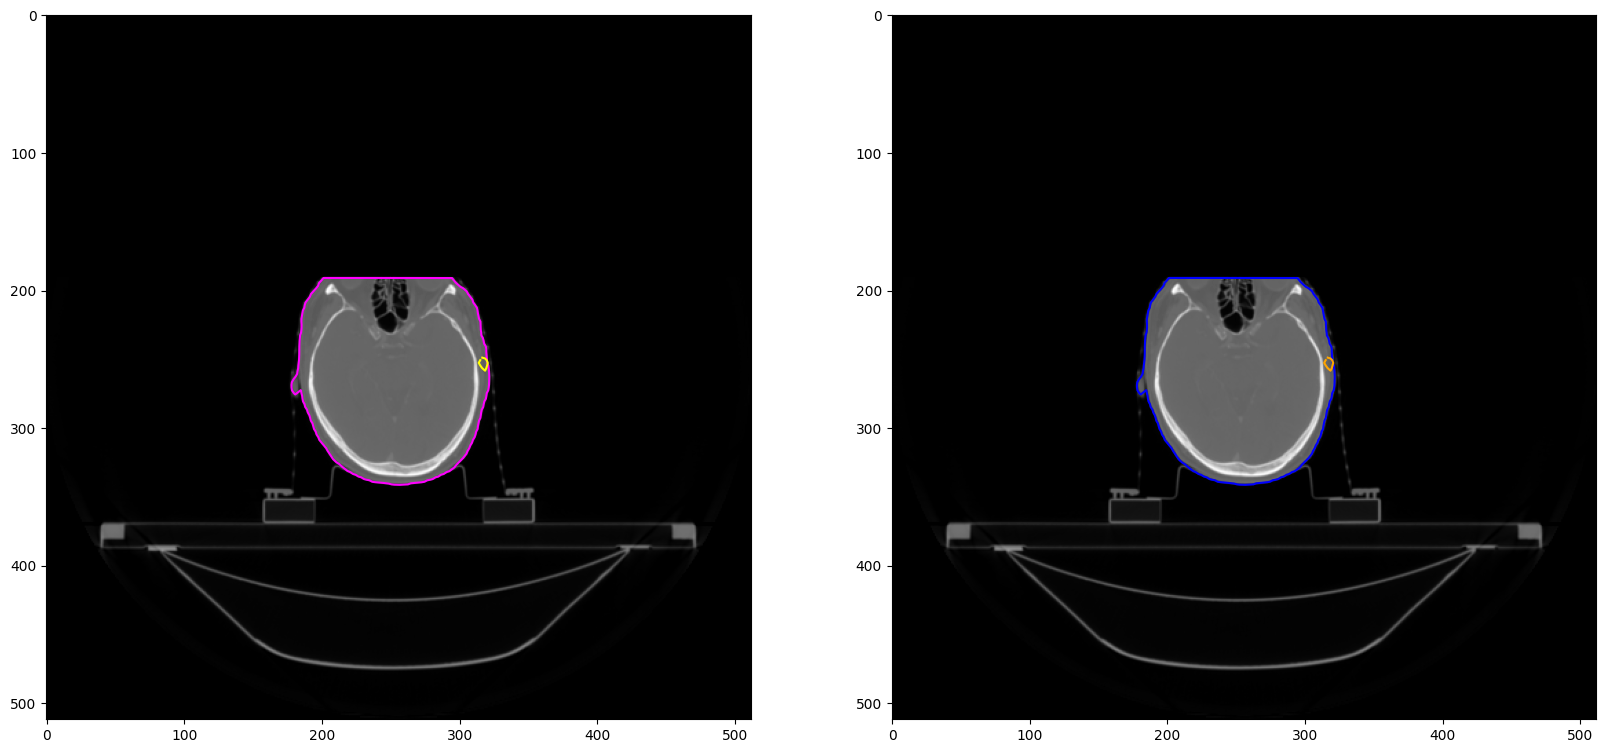

In [100]:

fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1,2,1)
plt.imshow(image[slice_num],cmap='gray')

plt.plot(roi_x_old1,roi_y_old1,'-',color='magenta')
plt.plot(roi_x_old2,roi_y_old2,'-',color='yellow')

fig.add_subplot(1,2,2)
plt.imshow(image[slice_num],cmap='gray')
plt.plot(roi_x_new1,roi_y_new1,'-',color='blue')
plt.plot(roi_x_new2,roi_y_new2,'-',color='orange')

In [19]:
RS = RS_old
for i, seq in enumerate(RS.StructureSetROISequence):
    if seq.ROIName == 'BODY':
            index = i
            break


for i, ROI_contour_seq in enumerate(RS.ROIContourSequence[index].ContourSequence):
    z_ref = ROI_contour_seq.ContourData[2] 
   
    if z_ref == -545:
        print("******************************************")
        print("z-refs")
        print(ROI_contour_seq.ContourData)
        print(ROI_contour_seq)

******************************************
z-refs
[-16.58, -38.8, -545, -14.13, -38.66, -545, -11.67, -38.51, -545, -10.79, -38.15, -545, -9.21, -37.54, -545, -6.76, -37.15, -545, -4.3, -37.21, -545, -1.84, -37.07, -545, 0.61, -37.15, -545, 3.07, -37.13, -545, 5.22, -35.69, -545, 5.53, -35.46, -545, 7.99, -34.08, -545, 8.89, -33.24, -545, 10.44, -32.01, -545, 12.11, -30.78, -545, 12.9, -30.13, -545, 15.36, -28.83, -545, 15.93, -28.32, -545, 17.81, -26.75, -545, 18.88, -25.87, -545, 20.27, -24.64, -545, 21.58, -23.41, -545, 22.73, -22.26, -545, 24.12, -20.95, -545, 25.18, -20.01, -545, 26.8, -18.5, -545, 27.64, -17.7, -545, 29.66, -16.04, -545, 30.1, -15.65, -545, 32.56, -14.74, -545, 34.3, -13.58, -545, 35.01, -13.08, -545, 37.47, -12.43, -545, 39.93, -11.34, -545, 40.14, -11.12, -545, 42, -8.67, -545, 42.38, -8.31, -545, 44.84, -6.86, -545, 45.76, -6.21, -545, 47.3, -5.19, -545, 48.91, -3.75, -545, 49.75, -2.91, -545, 51.37, -1.3, -545, 52.21, -0.5, -545, 53.87, 1.16, -545, 54.67, 2.1

In [12]:
RS = RS_new
for i, seq in enumerate(RS.StructureSetROISequence):
    if seq.ROIName == 'BODY':
            index = i
            break


for i, ROI_contour_seq in enumerate(RS.ROIContourSequence[index].ContourSequence):
    z_ref = ROI_contour_seq.ContourData[2] 
   
    if z_ref == -545:
        print("******************************************")
        print("z-refs")
        print(ROI_contour_seq.ContourData)
        print(ROI_contour_seq)

******************************************
z-refs
[-16.58, -38.8, -545, -14.13, -38.66, -545, -11.67, -38.51, -545, -10.79, -38.15, -545, -9.21, -37.54, -545, -6.76, -37.15, -545, -4.3, -37.21, -545, -1.84, -37.07, -545, 0.61, -37.15, -545, 3.07, -37.13, -545, 5.22, -35.69, -545, 5.53, -35.46, -545, 7.99, -34.08, -545, 8.89, -33.24, -545, 10.44, -32.01, -545, 12.11, -30.78, -545, 12.9, -30.13, -545, 15.36, -28.83, -545, 15.93, -28.32, -545, 17.81, -26.75, -545, 18.88, -25.87, -545, 20.27, -24.64, -545, 21.58, -23.41, -545, 22.73, -22.26, -545, 24.12, -20.95, -545, 25.18, -20.01, -545, 26.8, -18.5, -545, 27.64, -17.7, -545, 29.66, -16.04, -545, 30.1, -15.65, -545, 32.56, -14.74, -545, 34.3, -13.58, -545, 35.01, -13.08, -545, 37.47, -12.43, -545, 39.93, -11.34, -545, 40.14, -11.12, -545, 42, -8.67, -545, 42.38, -8.31, -545, 44.84, -6.86, -545, 45.76, -6.21, -545, 47.3, -5.19, -545, 48.91, -3.75, -545, 49.75, -2.91, -545, 51.37, -1.3, -545, 52.21, -0.5, -545, 53.87, 1.16, -545, 54.67, 2.1

In [27]:
def triangulate_structure(full_stack, keys):
    pts, indices = render_body(full_stack,keys)
    triangles = [indices[i:i+3] for i in range(0, len(indices), 3)]
    
    return pts, triangles
    

In [28]:
def generate_mesh_from_RS(RS, structure, z_min=None, z_max=None):#z_cutoff=None):
    dict_contours, z_lists = get_all_ROI_contours([structure], RS)
    full_stack, keys = get_contour_stack(structure, dict_contours)
    
#     if z_cutoff is not None:
#         for key in keys.copy():
#             print(key)
#             if key < z_cutoff:
# #                 print(key)
#                 full_stack.pop(key)
#                 keys.remove(key)
        
    if z_min is not None or z_max is not None:
        if z_min is None:
            z_min = min(keys)
        if z_max is None:
            z_max = max(keys)
            
        for key in keys.copy():

            if key < z_min or key > z_max:
#                 print(key)
                if key in full_stack:
                    full_stack.pop(key)
                if key in keys:
                    keys.remove(key)

    
    
    return triangulate_structure(full_stack, keys)

In [29]:
def generate_mesh_from_array(slice_stack, z_cutoff=None):
    full_stack_int = {}
    keys = []


    for slice in slice_stack:
        xi, yi, zi = slice[::3], slice[1::3], slice[2::3]
        if z_cutoff is not None and zi[0] < z_cutoff:
            continue

        keys.append(zi[0])
        # Fit spline with s=0 (passing through all points)
        tck, u = interpolate.splprep([xi, yi], s=0, per=True)

        # Evaluate spline for 1000 evenly spaced points
        xj, yj = interpolate.splev(np.linspace(0, 1, 1000), tck)
        zj = [zi[0]]*1000
        full_stack_int[zi[0]] = []
        
        for i in range(len(zj)):
            full_stack_int[zi[0]].append(xj[i]) 
            full_stack_int[zi[0]].append(yj[i])
            
    
    
    
    return triangulate_structure(full_stack_int, keys)

In [30]:

# from three import BufferGeometry, Vector3, Mesh, MeshPhongMaterial, Float32BufferAttribute, Uint8Array

def distance(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def closest_index(x, y, array):
    dist = distance(x, y, array[0], array[1])
    index = 0
    for j in range(2, len(array), 2):
        newdist = distance(x, y, array[j], array[j+1])
        if newdist < dist:
            dist = newdist
            index = j
    return index

def render_body(slices, keys):
    pts = []  # The 3D points making up the entire body
    indices = []  # The indices of those points ordered in such a way that it forms a triangular mesh
    curr = 0  # The index of the current point (in the overall pts array, not of the current slice)
    colours = []  # The array of colours assigned to each point

    # Sort slice height (z) to be floats and in order
    keys.sort()

    # Loop through each slice to form triangle faces between current and subsequent slice
    for i in range(len(keys)):
        z = float(keys[i])  # the z value (height) of the slice
        slice = []  # stores the x and y values of each point in the slice (they all have the same z value)
        slice2 = []

        # Parse the slice data
        slice = slices[keys[i]]


        # Do not do for last slice since it will have already been connected to the previous slice

        if i < len(keys) - 1:
            slice2 = slices[keys[i+1]]

            

        # Loop through the points in the current slice
        index = 0
        for j in range(0, len(slice), 2):
            pts.extend([slice[j], slice[j+1], z])

            # If first iteration, find starting point on second slice (this ensure both slices align)
            if j == 0 and i != len(keys)-1:
                index = closest_index(slice[j], slice[j+1], slice2)

#             # Check if point is inside one of the beams (stored in meshes array) and sets colour accordingly
#             point = Vector3(slice[j], slice[j+1], z)
#             is_inside = False

#             for mesh in meshes:
#                 if ConvexHull(mesh).containsPoint(point):
#                     is_inside = True
#                     break
#             if is_inside:
#                 colours.extend([153, 153, 255])  # blue
#             else:
#                 colours.extend([127, 127, 127])  # grey

            # Algorithm to create two triangular faces (between points [c,a,d] and [a,b,d] per point
            if j != len(slice)-2 and i != len(keys)-1:
                a = curr
                b = curr - j//2 + len(slice)//2 + ((index//2)+j//2) % (len(slice2)//2)
                c = curr + 1
                d = curr - j//2 + len(slice)//2 + ((index//2)+j//2 +1) % (len(slice2)//2)

                indices.extend([c, a, d])
                indices.extend([a, b, d])

            # For the final point in the slice, algorithm is such that it links back to first points of each slice
            if j == len(slice)-2 and i != len(keys)-1:
                a = curr
                b = curr + (((index//2) + len(slice2)//2) ) % (len(slice2)//2)
                if index == 0:
                    b += len(slice2)//2
                c = curr - j//2
                d = curr + 1 + ((index//2)) % (len(slice2)//2)

                indices.extend([c, a, d])
                indices.extend([a, b, d])

            # Algorithm to cap top and bottom slices (creates triangles across the slice instead of to next slice)
            if (i == len(keys)-1 or i == 0) and j == 0:
                for k in range(1, len(slice)//4):
                    a = curr + k - 1
                    b = curr + (len(slice)//2 - k)
                    c = curr + k
                    d = curr + (len(slice)//2 - k - 1)

                    indices.extend([c, a, d])
                    indices.extend([a, b, d])

            curr += 1
    return pts, indices

    # Create buffer geometry from points and set index and position attributes
#     geo = BufferGeometry()
#     geo.set_index(indices)
#     geo.set_attribute('position', Float32BufferAttribute(pts, 3))

#     geo.compute_bounding_sphere()
#     geo.compute_vertex_normals()

#     # Set colour attribute
#     colours = Uint8Array(colours)
#     geo.set_attribute('color', BufferAttribute(colours, 3, True))
#     geo.attributes.color.normalized = True

#     # Create final mesh
#     mesh = Mesh(geo, MeshPhongMaterial(vertex_colors=VertexColors, side=DoubleSide, shininess=0))
#     group.add(mesh)

In [31]:
def get_contour_stack(contour_name, dict_contours,cutoff=-1000):
    XN = []
    YN = []
    ZN = []
    fullN = []
    full_stack_N = []
    y_prev = 0
    x_prev = 0
    for c in dict_contours[contour_name]:
    
        test = c
    #     full = full + list(c)
        slice = []

        if c[2] < cutoff:
            continue

        for i in range(0,len(c),3):

            x = test[i]
            y = test[i+1]
            z = test[i+2]

            if not (y== y_prev and x==x_prev): # ensure interpolation functin oworks
                XN.append(x)
                YN.append(y)
                ZN.append(z)
                fullN.append([x,y,z])
                slice = slice + [x,y,z]
            y_prev = y
            x_prev = x

        full_stack_N.append(slice)
        
            # full_stack = full_stack_N
    
    full_stack_int = {}
    keys = []


    for slice in full_stack_N:
        

    #     break
        xi, yi, zi = slice[::3], slice[1::3], slice[2::3]
#  
        # Append starting coordinates to make it closed
    #     xi = np.r_[xi, xi]
    #     yi = np.r_[yi, yi]

        keys.append(zi[0])
        # Fit spline with s=0 (passing through all points)
        tck, u = interpolate.splprep([xi, yi], s=0, per=True)

        # Evaluate spline for 1000 evenly spaced points
        xj, yj = interpolate.splev(np.linspace(0, 1, 1000), tck)
        zj = [zi[0]]*1000
        full_stack_int[zi[0]] = []
        print
        for i in range(len(zj)):
            full_stack_int[zi[0]].append(xj[i]) 
            full_stack_int[zi[0]].append(yj[i])

    return full_stack_int, keys



    

<Figure size 2000x2000 with 0 Axes>

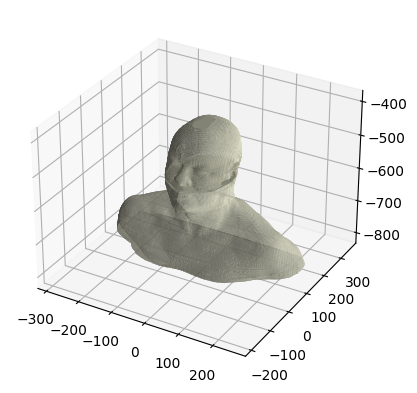

In [34]:

fig = plt.figure(figsize=(20, 20))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ptsL, trianglesL = generate_mesh_from_RS(RS,'BODY',z_max=7)
ax.plot_trisurf(ptsL[::3], ptsL[1::3], ptsL[2::3], triangles=trianglesL, alpha=1, shade=True,color='beige')  
ax.set_aspect('equal', adjustable='box')
plt.show()